___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

Data vocabulary:

1. #3 (age): age in years 
2. #4 (sex): sex (1 = male; 0 = female) 
3. #9 (cp): cp: chest pain type | Value 0: typical angina | Value 1: atypical angina | Value 2: non-anginal pain | Value 3: asymptomatic 
4. #10 (trestbps): resting blood pressure (in mm Hg on admission to the hospital) 
5. #12 (chol): serum cholestoral in mg/dl 
6. #16 (fbs): (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) 
7. #19 (restecg): resting electrocardiographic results | Value 0: normal | Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV) | Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria 
8. #32 (thalach): maximum heart rate achieved 
9. #38 (exang): exercise induced angina (1 = yes; 0 = no) 
10. #40 (oldpeak): ST depression induced by exercise relative to rest 
11. #41 (slope): the slope of the peak exercise ST segment | Value 1: upsloping | Value 2: flat | Value 3: downsloping 
12. #44 (ca): number of major vessels (0-3) colored by flourosopy 
13. #51 (thal): 3 = normal; 6 = fixed defect; 7 = reversable defect 
14. #58 (num) (the predicted attribute): Value 0: < 50% diameter narrowing | Value 1: > 50% diameter narrowing 

thal: A blood disorder called thalassemia Value 0: NULL (dropped from the dataset previously
Value 1: fixed defect (no blood flow in some part of the heart)
Value 2: normal blood flow
Value 3: reversible defect (a blood flow is observed but it is not normal)

# Import esential Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, OneHotEncoder,StandardScaler,PowerTransformer, MinMaxScaler, RobustScaler
from sklearn.model_selection import KFold, cross_val_predict, train_test_split,GridSearchCV,cross_val_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge,ElasticNet
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.feature_selection import SelectKBest,SelectPercentile,f_classif,f_regression,mutual_info_regression,mutual_info_classif,SelectFromModel,RFE
import warnings
warnings.filterwarnings('ignore')
pd.set_option('max_columns',100)
pd.set_option('max_rows',900)
pd.set_option('max_colwidth',200)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, plot_confusion_matrix
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve, roc_auc_score, auc, roc_curve
from sklearn.impute import SimpleImputer

# Ingest the data to notebook

In [2]:
heart = pd.read_csv('heart.csv')
df = heart.copy()
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# EDA

In [3]:
df.shape

(303, 14)

In [4]:
for i in df.columns:
    print(i,df[i].value_counts(), sep= '\n')
    print('-------------------')

age
58    19
57    17
54    16
59    14
52    13
51    12
62    11
44    11
60    11
56    11
64    10
41    10
63     9
67     9
55     8
45     8
42     8
53     8
61     8
65     8
43     8
66     7
50     7
48     7
46     7
49     5
47     5
39     4
35     4
68     4
70     4
40     3
71     3
69     3
38     3
34     2
37     2
77     1
76     1
74     1
29     1
Name: age, dtype: int64
-------------------
sex
1    207
0     96
Name: sex, dtype: int64
-------------------
cp
0    143
2     87
1     50
3     23
Name: cp, dtype: int64
-------------------
trestbps
120    37
130    36
140    32
110    19
150    17
138    13
128    12
125    11
160    11
112     9
132     8
118     7
135     6
108     6
124     6
145     5
134     5
152     5
122     4
170     4
100     4
142     3
115     3
136     3
105     3
180     3
126     3
102     2
94      2
144     2
178     2
146     2
148     2
129     1
165     1
101     1
174     1
104     1
172     1
106     1
156     1
164     1
192   

In [5]:
df = df[df.ca != 4]

In [6]:
df.shape

(298, 14)

In [7]:
df = df[df.restecg != 2]

In [8]:
df.shape

(294, 14)

In [9]:
soz = {0: 'typical angina', 1: 'atypical angina', 2: 'non-anginal pain', 3: 'asymptomatic'}

In [10]:
df.cp = df.cp.map(soz)

In [11]:
df.cp.value_counts()

typical angina      139
non-anginal pain     83
atypical angina      49
asymptomatic         23
Name: cp, dtype: int64

In [12]:
soz1 = {0: 'normal', 1: 'having ST-T wave abnormality', 2: 'showing probable'}

In [13]:
df.restecg = df.restecg.map(soz1)

In [14]:
df.restecg.value_counts()

having ST-T wave abnormality    148
normal                          146
Name: restecg, dtype: int64

In [15]:
soz2 = {0: 'upsloping', 1: 'flat', 2: 'downsloping'}

In [16]:
df.slope = df.slope.map(soz2)

In [17]:
df.slope.value_counts()

downsloping    139
flat           135
upsloping       20
Name: slope, dtype: int64

In [18]:
df.thal.value_counts()

2    161
3    114
1     17
0      2
Name: thal, dtype: int64

In [19]:
df = df[df.thal != 0]

In [20]:
df.shape

(292, 14)

In [21]:
soz3 = {1: 'fixed defect', 2: 'normal blood flow', 3: 'reversible defect'}

In [22]:
df.thal = df.thal.map(soz3)

In [50]:
df.duplicated().sum()

0

In [23]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [24]:
df.describe()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,target
count,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000
mean,54.434932,0.684932,131.482877,246.955479,0.147260,149.886986,0.325342,1.036301,0.674658,0.544521
std,9.031401,0.465341,17.582297,51.815043,0.354974,22.927292,0.469307,1.148307,0.934436,0.498869
min,29.000000,0.000000,94.000000,126.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000
25%,47.750000,0.000000,120.000000,211.750000,0.000000,135.500000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,130.000000,242.500000,0.000000,153.000000,0.000000,0.800000,0.000000,1.000000
75%,61.000000,1.000000,140.000000,275.000000,0.000000,166.000000,1.000000,1.600000,1.000000,1.000000
max,77.000000,1.000000,200.000000,564.000000,1.000000,202.000000,1.000000,6.200000,3.000000,1.000000


In [25]:
df = pd.get_dummies(df, drop_first = True)

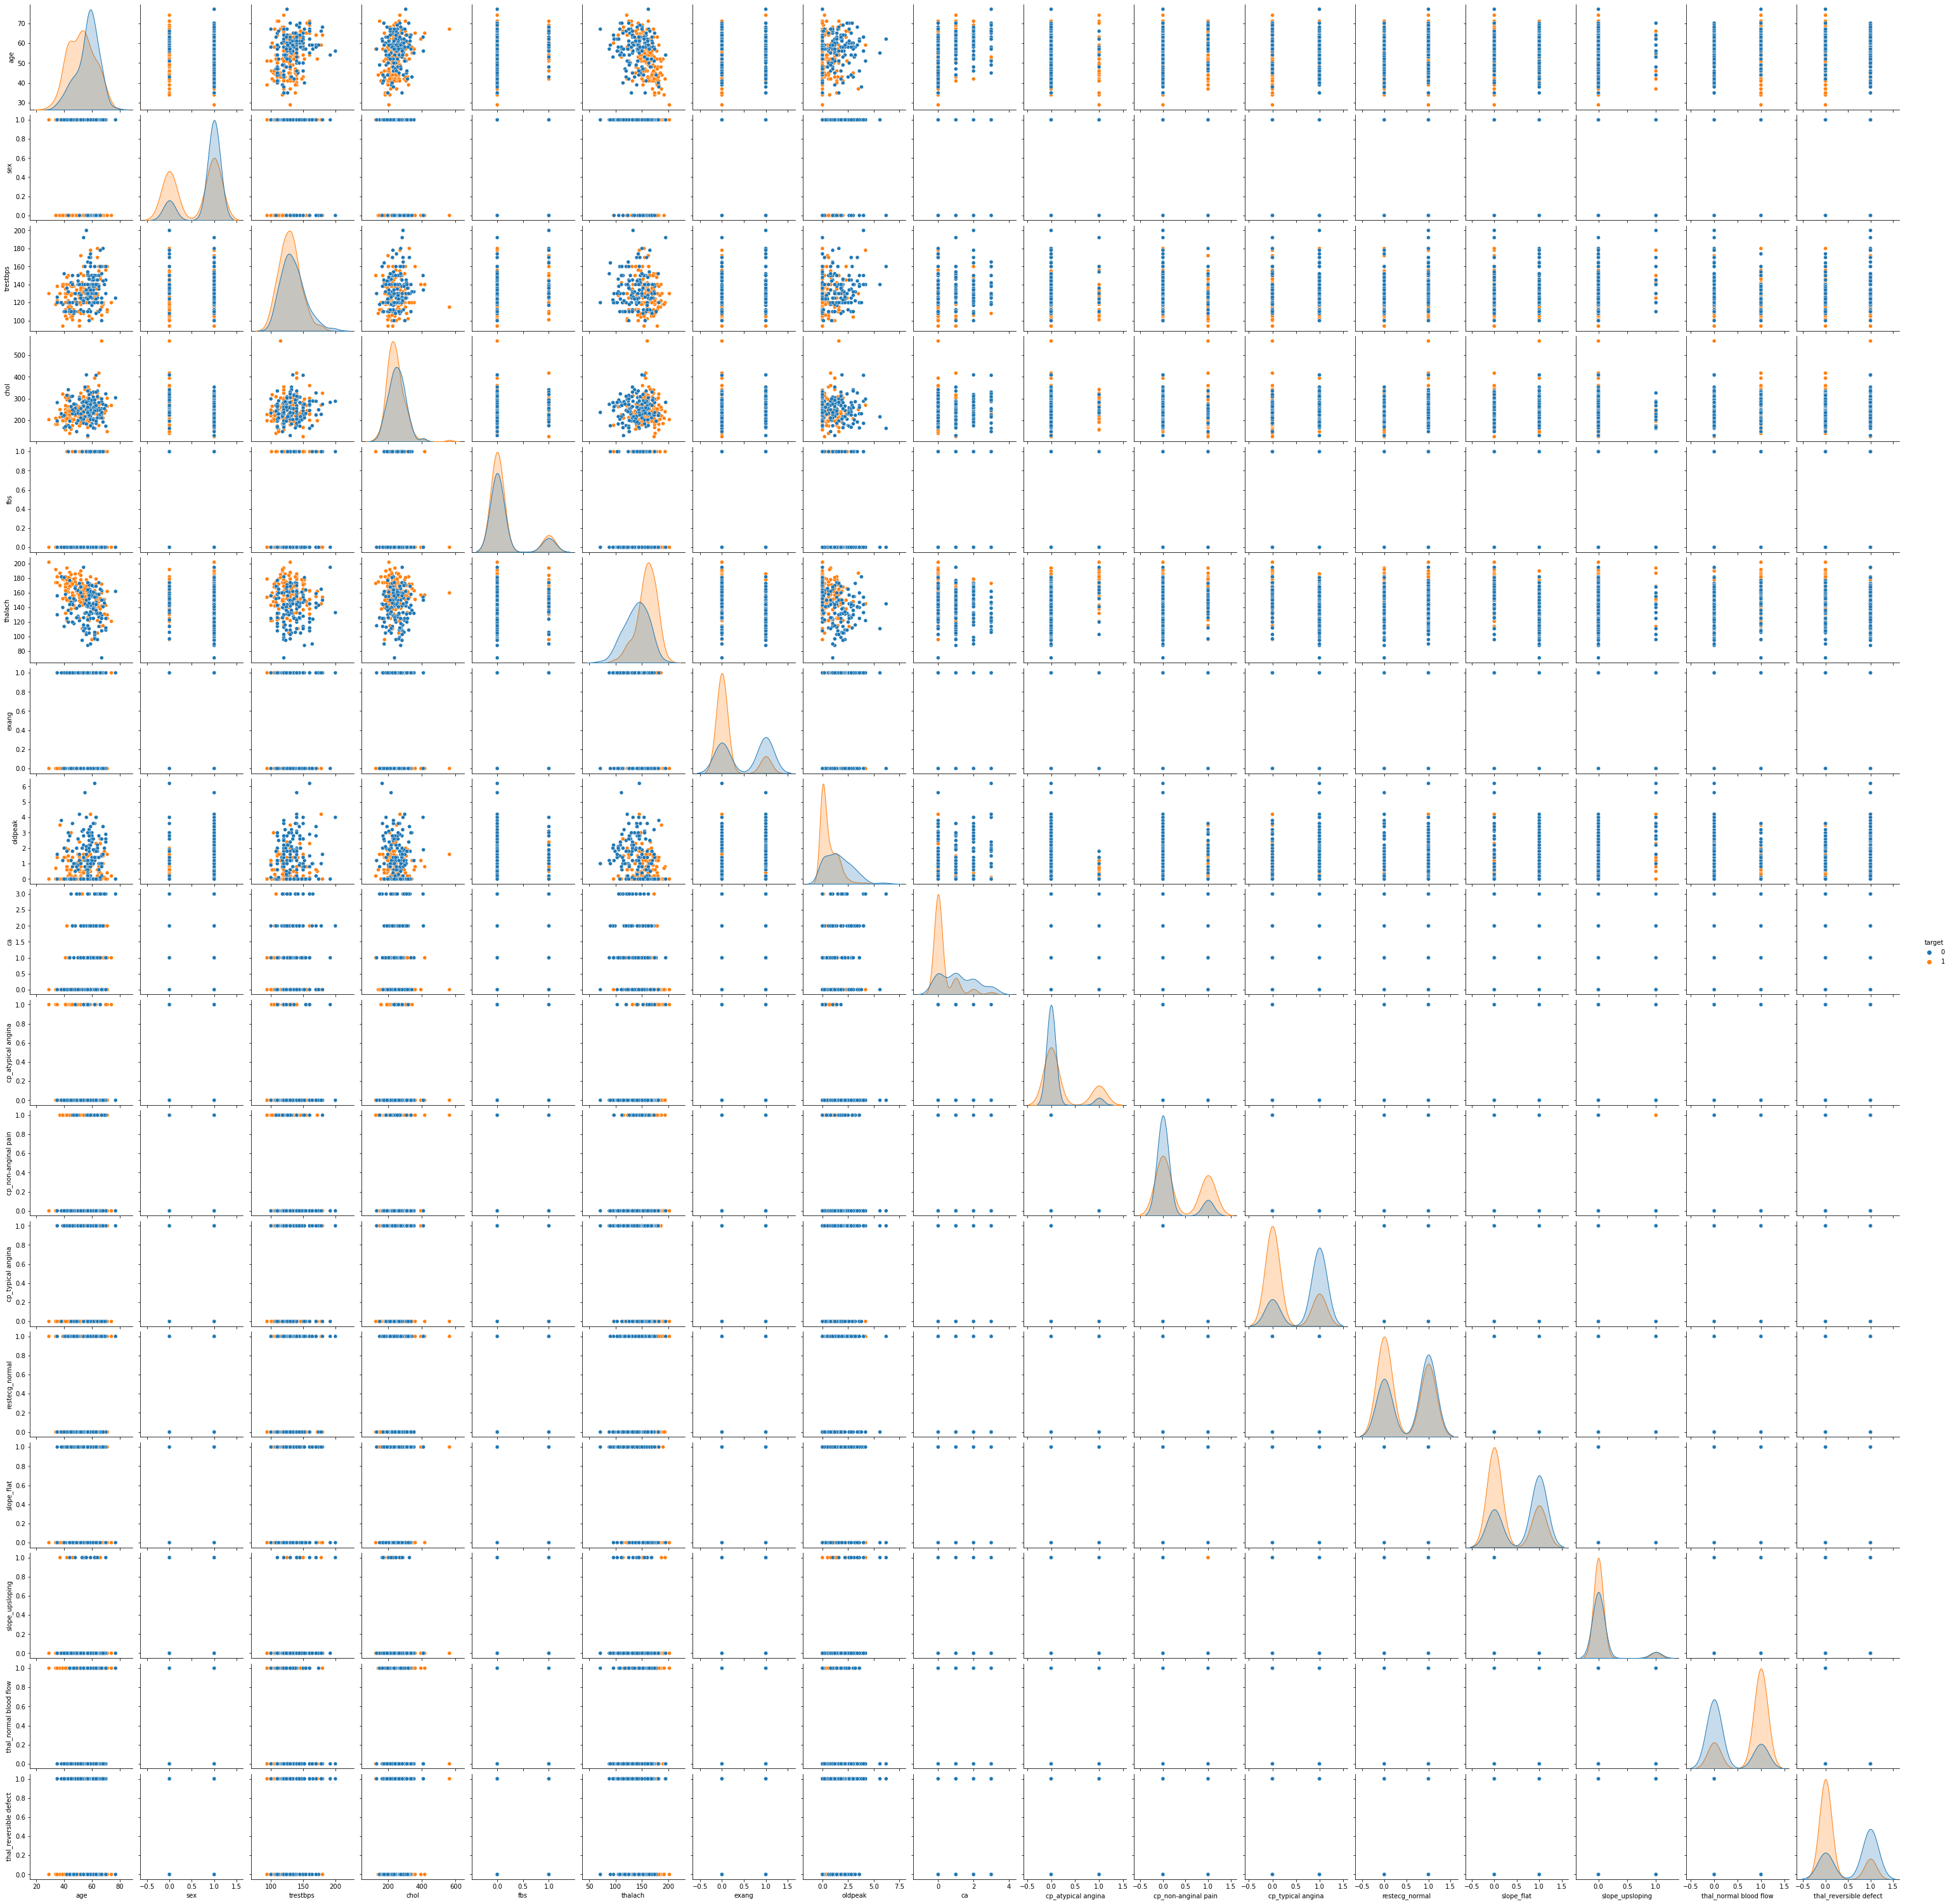

In [49]:
sns.pairplot(df, hue= 'target')

<AxesSubplot:>

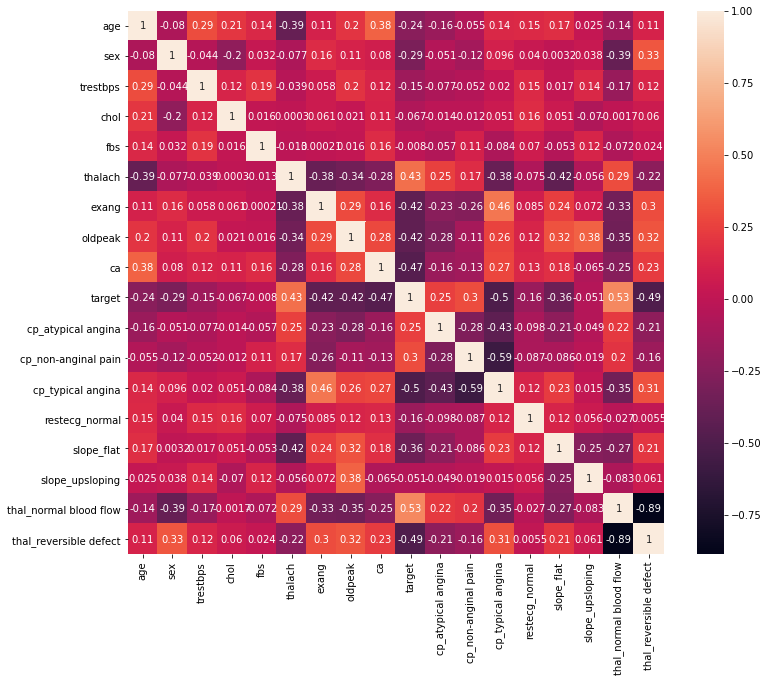

In [27]:
plt.figure(figsize =(12,10))
sns.heatmap(df.corr(), annot = True)

# Data Preprocessing

In [28]:
X = df.drop('target', axis =1)
y = df['target']

In [29]:
y.value_counts() #dengeli

1    159
0    133
Name: target, dtype: int64

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 101)

In [31]:
scaler = MinMaxScaler()

In [32]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Implement Logistic Regression and Evaluate

In [51]:
log_model = LogisticRegression()

In [34]:
log_model.fit(X_train_scaled,y_train)
y_pred = log_model.predict(X_test_scaled)

In [35]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[30  7]
 [ 7 29]]
              precision    recall  f1-score   support

           0       0.81      0.81      0.81        37
           1       0.81      0.81      0.81        36

    accuracy                           0.81        73
   macro avg       0.81      0.81      0.81        73
weighted avg       0.81      0.81      0.81        73



In [36]:
from sklearn.model_selection import cross_validate
model = LogisticRegression()

scores = cross_validate(model, X_train_scaled, y_train, scoring = ['accuracy', 'precision','recall','f1'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
#df_scores
df_scores

,fit_time,score_time,test_accuracy,test_precision,test_recall,test_f1
1,0.012999,0.005007,0.772727,0.900000,0.692308,0.782609
2,0.017255,0.006982,0.545455,0.588235,0.769231,0.666667
3,0.009999,0.004024,0.772727,0.785714,0.846154,0.814815
4,0.010367,0.003999,0.954545,0.923077,1.000000,0.960000
5,0.021013,0.004992,0.818182,0.785714,0.916667,0.846154
6,0.013038,0.003970,0.909091,0.857143,1.000000,0.923077
7,0.009015,0.005583,0.863636,0.846154,0.916667,0.880000
8,0.008958,0.003027,0.863636,0.846154,0.916667,0.880000
9,0.010977,0.006001,0.954545,1.000000,0.916667,0.956522
10,0.009554,0.002999,0.857143,0.909091,0.833333,0.869565


In [37]:
y_pred_proba = log_model.predict_proba(X_test_scaled)

In [38]:
fp_rate, tp_rate, thresholds = roc_curve(y_test, y_pred_proba[:,1])

In [39]:
optimal_idx = np.argmax(tp_rate - fp_rate)
optimal_threshold = thresholds[optimal_idx]
optimal_threshold

0.3234236338995595

In [40]:
test_data = pd.concat([X_test, y_test], axis=1)
test_data["pred_proba"] = y_pred_proba[:,1]
test_data["pred"] = y_pred
test_data["pred2"] = test_data["pred_proba"].apply(lambda x : 1 if x >= optimal_threshold else 0)
y_pred2 = test_data["pred2"]

In [41]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[30  7]
 [ 7 29]]
              precision    recall  f1-score   support

           0       0.81      0.81      0.81        37
           1       0.81      0.81      0.81        36

    accuracy                           0.81        73
   macro avg       0.81      0.81      0.81        73
weighted avg       0.81      0.81      0.81        73



In [42]:
print(confusion_matrix(y_test,y_pred2))
print(classification_report(y_test,y_pred2))

[[26 11]
 [ 1 35]]
              precision    recall  f1-score   support

           0       0.96      0.70      0.81        37
           1       0.76      0.97      0.85        36

    accuracy                           0.84        73
   macro avg       0.86      0.84      0.83        73
weighted avg       0.86      0.84      0.83        73



# Implement KNN and Evaluate

In [43]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
knn_grid = KNeighborsClassifier()
k_values= range(1,30)
param_grid = {"n_neighbors":k_values, "p": [1,2], "weights": ['uniform', "distance"]}
knn_grid_model = GridSearchCV(knn_grid, param_grid, cv=10, scoring= 'accuracy')
knn_grid_model.fit(X_train_scaled, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 30), 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [44]:
knn_grid_model.best_params_

{'n_neighbors': 11, 'p': 1, 'weights': 'uniform'}

In [45]:
knn = KNeighborsClassifier(n_neighbors=11, p =1)

knn.fit(X_train_scaled,y_train)
pred = knn.predict(X_test_scaled)

print('WITH K=11')
print('\n')
print(confusion_matrix(y_test, pred))
print('\n')
print(classification_report(y_test, pred))

WITH K=11


[[29  8]
 [ 7 29]]


              precision    recall  f1-score   support

           0       0.81      0.78      0.79        37
           1       0.78      0.81      0.79        36

    accuracy                           0.79        73
   macro avg       0.79      0.79      0.79        73
weighted avg       0.79      0.79      0.79        73



In [46]:
test_error_rates = []


for k in range(1,30):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train_scaled,y_train) 
   
    y_pred_test = knn_model.predict(X_test_scaled)
    
    test_error = 1 - accuracy_score(y_test,y_pred_test)
    test_error_rates.append(test_error)

Text(0.5, 0, 'K Value')

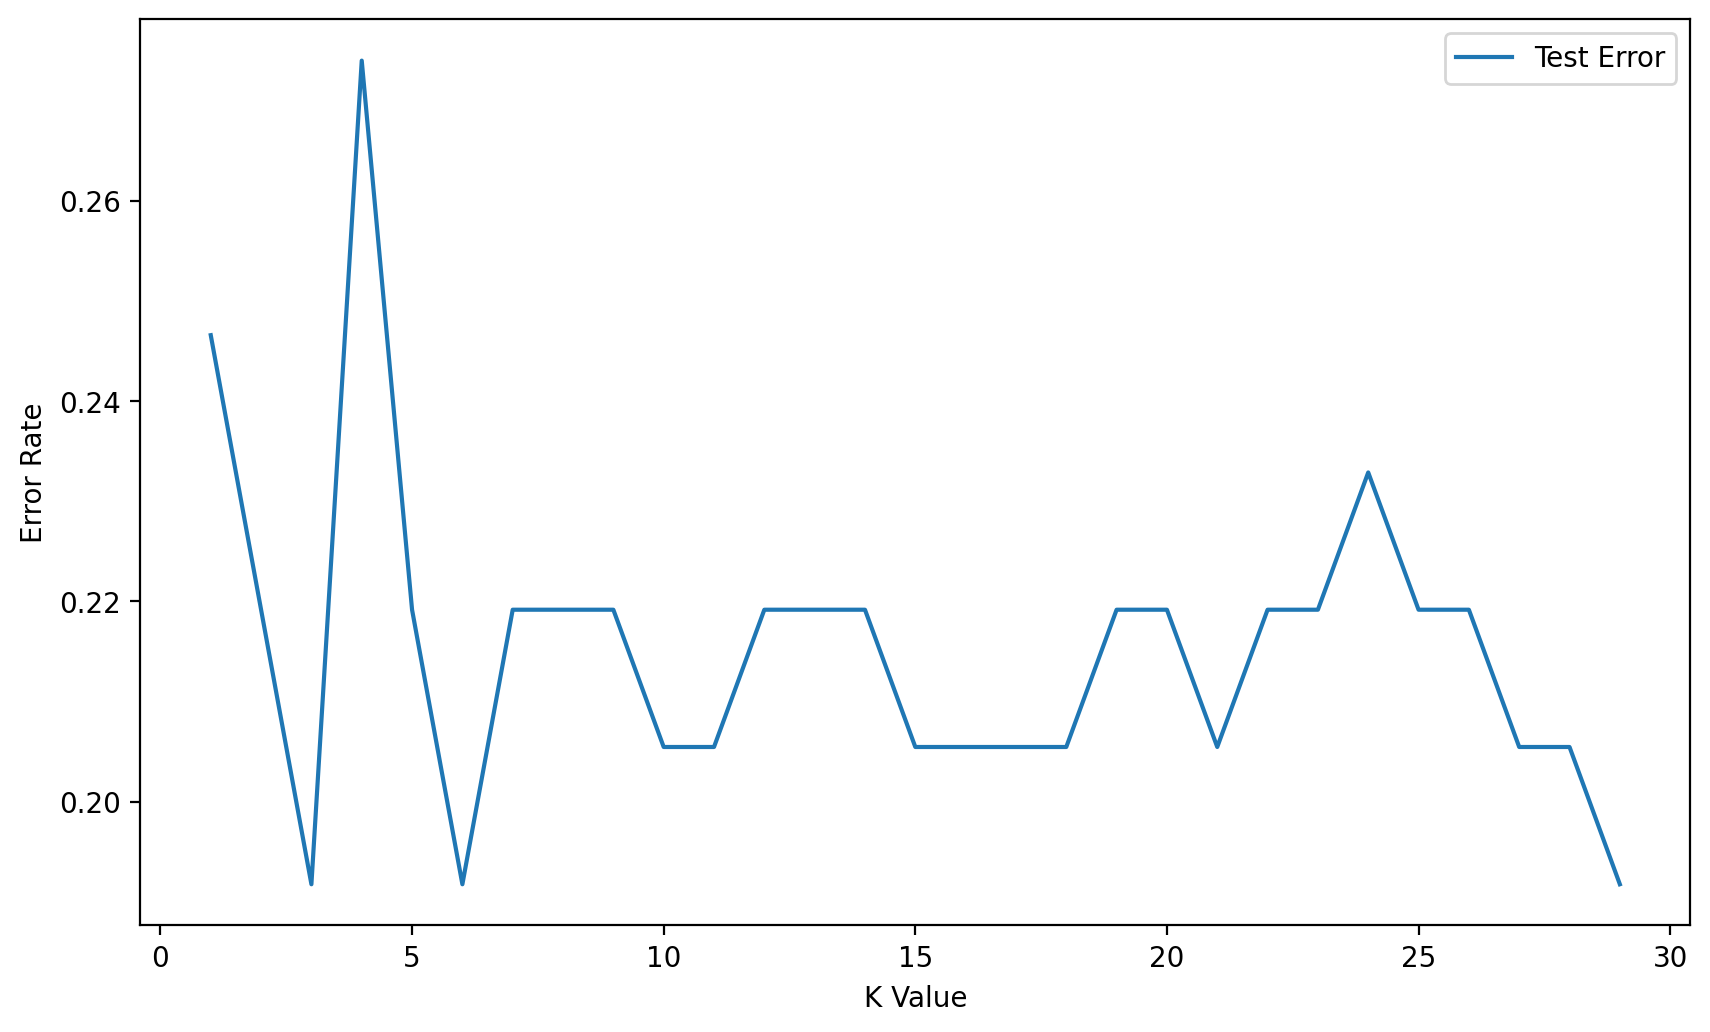

In [47]:
plt.figure(figsize=(10,6),dpi=200)
plt.plot(range(1,30),test_error_rates,label='Test Error')
plt.legend()
plt.ylabel('Error Rate')
plt.xlabel("K Value")

# Implement SVM and Evaluate

# Visually compare models based on your chosen metric

# Chose best model and make a random prediction 